Dataset: 
The dataset is information about different types of car in the American market.

Problem Statement:
To find the characteristics that affects the pricing of car in the US.
Which variables are significant in predicting the price of a car.

*Import Data from Module

*Descriptive Statistical Analysis

*Analyzing Individual Feature Patterns using Visualization

*Basics of Grouping

*Correlation and Causation


Please Note : The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


# 1.Import Dataset

In [2]:
url = '../input/car-price-prediction/CarPrice_Assignment.csv'
df = pd.read_csv(url)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
print('Dimensionality:',df.shape)
df.dtypes

Dimensionality: (205, 26)


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# 2.Descriptive Statistical Analysis

In [4]:
#descriptive statistics
df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.describe(include = ['object'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Analyze categorical variables:'fueltype', 'drivewheel','enginelocation'

In [6]:
fueltype_valuecounts=df['fueltype'].value_counts().to_frame()
fueltype_valuecounts.rename(columns={"fueltype":"count"},inplace=True)
fueltype_valuecounts.index.name = 'fueltype'
fueltype_valuecounts

,count
fueltype,
gas,185
diesel,20


In [7]:
drivewheel_count = df["drivewheel"].value_counts().to_frame()
drivewheel_count.rename(columns={"drivewheel":"Counts"},inplace =True)
drivewheel_count.index.name='drivewheel'
drivewheel_count

,Counts
drivewheel,
fwd,120
rwd,76
4wd,9


In [8]:
engineloc_counts=df['enginelocation'].value_counts().to_frame()
engineloc_counts.rename(columns={'enginelocation':'counts'}, inplace =True)
engineloc_counts.index.name= 'enginelocation'
engineloc_counts

,counts
enginelocation,
front,202
rear,3


After examining,it can be seen fueltype and enginelocation are not good indicators of price as there is only 20 vehicles with diesel against 185 in gas and only 3 vehicles with rear engine location against 202 with front enegine location, hence the results are skewed.

# 3.Categorical Variables

Categorical Variable can be analyzed using boxplots. The category variables considered for analysis:drivewheel,carbody

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

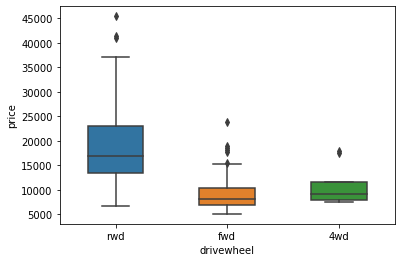

In [9]:
sns.boxplot(x="drivewheel",y="price",width = .5,data=df)

<AxesSubplot:xlabel='carbody', ylabel='price'>

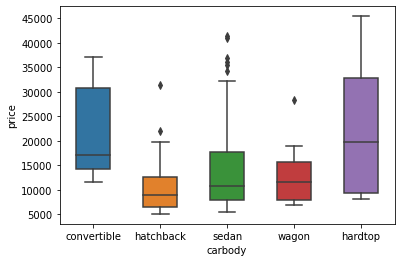

In [10]:
sns.boxplot(x="carbody",y="price",width = .5,data=df)

The distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. 

# 4.Grouping 

The data can be grouped based on one or more varaibles and then analysis is carried out on individual variables.

In [11]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [12]:
df_group_one = df[['drivewheel','carbody','price']]
df_group_one

,drivewheel,carbody,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [13]:
df_group_dw = df_group_one.groupby(['drivewheel'],as_index=False).mean()
df_group_dw = df_group_dw.round(decimals =2)
df_group_dw

,drivewheel,price
0,4wd,11087.46
1,fwd,9239.31
2,rwd,19910.81


In [14]:
df_group = df_group_one.groupby(['drivewheel','carbody'],as_index=False).mean()
grouped_pivot = df_group.pivot(index='drivewheel',columns='carbody')
grouped_pivot = grouped_pivot.fillna(0).round(decimals=2)
grouped_pivot

price                                        
carbody    convertible   hardtop hatchback     sedan     wagon
drivewheel                                                    
4wd                0.0      0.00  12731.08  12647.33   9095.75
fwd            11595.0   8249.00   8396.39   9780.39   9997.33
rwd            23949.6  24202.71  15235.82  21711.83  16994.22

Visualization of variables :Drivewheel,Carbody and Price
A heatmap to show the relation of Drivwheel and carbody to price

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

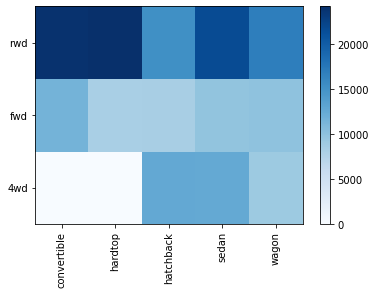

In [16]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='Blues')

#label names

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# 5.Correlation 

In [17]:
#correlation between variables
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


> # Correlation between Engine Size and Price

(0.0, 53704.599428881535)

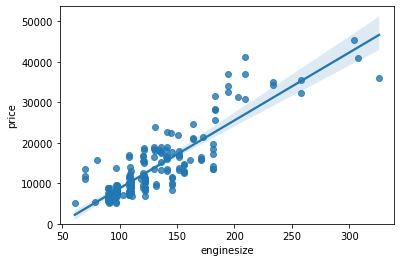

In [18]:
sns.regplot(x='enginesize',y='price',data=df)
plt.ylim(0,)


In [19]:
#Calculate Pearson's Correlation Coefficient and p-value
pearson_coef, p_value =sts.pearsonr(df["enginesize"],df["price"])
print('Correlation_Coeff = ',pearson_coef,'P-value = ',p_value)

Correlation_Coeff =  0.8741448025245117 P-value =  1.3547637598648421e-65


<h4>Conclusion:</h4>
Correlation_Coeff =  0.8741448025245117 P-value =  1.3547637598648421e-65

<p>Since the p-value for the correlation between Enginesize and Price is $<$ 0.05, which indicates the correlation between engine-size and price is statistically significant. Also the linear relationship is very strong (~0.874).<p>



# Correlation between Highway MPG with price
The predictor 'Highway mpg' has a negative correlation with target variable.

(0.0, 48133.14036732739)

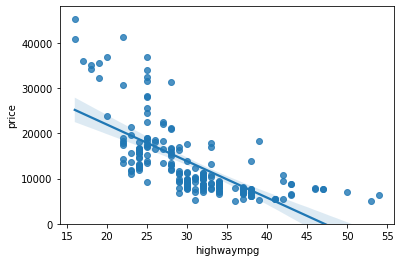

In [20]:
sns.regplot(x='highwaympg',y='price',data=df)
plt.ylim(0,)


In [21]:
#Calculate Pearson's Correlation Coefficient and p-value
pearson_coef, p_value =sts.pearsonr(df["highwaympg"],df["price"])
print('Correlation_Coeff = ',pearson_coef,'P-value = ',p_value)

Correlation_Coeff =  -0.6975990916465562 P-value =  3.2306813803648306e-31


<h4>Conclusion:</h4>
Correlation_Coeff =  -0.6975990916465562 P-value =  3.2306813803648306e-31

<p>Since the p-value for the correlation between highway mpg and Price is $<$ 0.05, which indicates the association between engine-size and price is statistically significant. But the linear relationship is not very strong (~-0.697).</p>.



# Relation Between Peakrpm and Price
The chracteristic Peakrpm has a weak correlation with the target varaible.

(0.0, 47414.1)

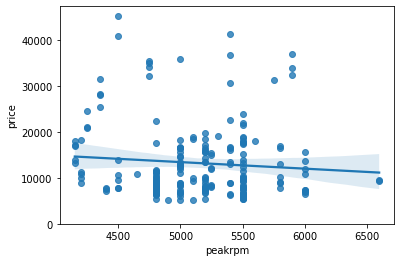

In [22]:
sns.regplot(x='peakrpm',y='price',data=df)
plt.ylim(0,)

In [23]:
#Calculate Pearson's Correlation Coefficient and p-value
pearson_coef, p_value =sts.pearsonr(df["peakrpm"],df["price"])
print('Correlation_Coeff = ',pearson_coef,'P-value = ',p_value)

Correlation_Coeff =  -0.08526715027785688 P-value =  0.22414123444667824


Conclusion:
Correlation_Coeff = -0.08526715027785688 P-value = 0.22414123444667824
<p>Since the p-value for the correlation between Peakrpm and Price is greater than the significance level 0.05, which indicates there is inconclusive evidence about the significance of the association between the variables.